# Lista 5 - Aprendizagem Automática

**Davi Braga Gomes - 0396905**

K-médias e PCA
    
## 1)  K-médias




- Carregue os dados contidos no arquivo ex5data1.data. O arquivo contém uma matriz de dados.
  Esta matriz é composta de 150 linhas e 5 colunas. As 4 primeiras colunas representam 4 atributos e a coluna 5 representa a classe a qual pertence o exemplo. Nestes dados, existem 3 classes, sendo 50 exemplos de cada classe.
  Os dados pertencem a um problema de reconhecimento flores (íris dataset). Os 4 atributos são tamanho e espessura da sépala e da pétala de cada flor. As três classes referem-se as flores 1-setosa, 2- versicolor e 3-virginica.
- Implemente o k-médias para a base de dados, utilizando somente os 4 primeiros atributos.
- Varie o número de clusters entre 2 e 5
- Calcule o somatório dos erros quadráticos em relação aos centroides para cada número de agrupamentos.
  - **Apresentar**: Gráfico do erro pelo número de agrupamentos
  - **Apresentar**: O número de agrupamentos para este problema, de acordo com a heurística apresentada em aula
  - **Comentários**: Comente sobre o número de classes obtido
- Execute o K-médias para o número de agrupamentos obtidos
- Compare o resultado com o valor real das classes
  - **Comentários**: Comente sobre o resultado obtido

### Carregando os dados:

In [1]:
import numpy as np
import pandas as pd

attributes = ['X1', 'X2', 'X3', 'X4', 'Y']
df = pd.read_csv('ex5data1.data', names=attributes);

### Normalizando os dados:

In [2]:
df_inputs = df[attributes[:-1]]
df_inputs_norm = df_inputs.apply(lambda series: (series - series.mean())/series.std(ddof=0))
df_inputs_norm['Y'] = df['Y']
data = df_inputs_norm[attributes[:-1]].values

### Implementando o k-médias:

In [3]:
class KMeans:
    
    def __init__(self, k):
        self.k = k
        self.means = None            
        
    def classify(self, point):
        return min(range(self.k), key=lambda i: np.linalg.norm(point - self.means[i]))
    
    def train(self, data):
        n_rows = data.shape[0]
        idx = np.random.randint(n_rows, size=self.k)
        self.means = data[idx,:]
        
        assignments = None
        
        while True:
            
            new_assignments = map(self.classify, data)
            
            if assignments == new_assignments:
                return
            
            assignments = new_assignments
            
            d = {i:[] for i in range(self.k)}
            
            for record in data:
                d[self.classify(record)].append(record)
                
            for key, values in d.items():
                array = np.asarray(values)
                if (array.size > 0):
                    self.means[key] = array.mean(axis=0)
                
    def error(self, data):
        classified_data = zip(map(self.classify, data), data)
        error = map(lambda i: np.linalg.norm(i[1] - self.means[i[0]]), classified_data)
        return np.asarray(error).mean()

### Gráfico do erro pelo número de agrupamentos:

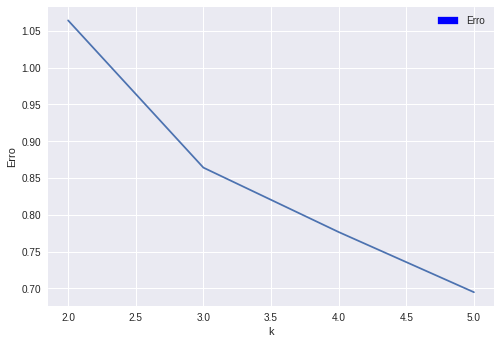

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

n = 5
errors = []
for i in range(2,n+1):
    clf_t = KMeans(i)
    clf_t.train(data)
    errors.append(clf_t.error(data))
    
blue_patch = mpatches.Patch(color='blue', label='Erro')
plt.legend(handles=[blue_patch])
    
plt.plot(range(2,n+1), errors)
plt.xlabel("k")
plt.ylabel("Erro")
plt.show()

### Escolhendo o número de agrupamentos:
 Uma possível heurística para escolher o melhor k é selecionar aquele a partir do qual o erro passa a diminuir menos acentuadamente, ou seja, o "joelho" do gráfico. Observando o gráfico acima podemos concluir que um bom número de agrupamentos seria 3.

### Comentário sobre o número de classes ecolhidas:

A heurística utilizada é considerada boa pois leva em conta taxa de dimiuição do erro e não o erro em si. Esse critério faz sentido uma vez que tendência do erro é diminuir até o cenário indesejado onde ele é zero e o número de classes é igual ao número de pontos do dataset. Portanto, seguindo esse critério, devemos escolher um k baseado nos ganhos marginais de diminuição do erro. O número de agrupamentos escolhidos por meio da heurística foi 3, coincidindo com o número de agrupamentos do dataset real.

### Executando o k-médias com k=3

In [18]:
num_of_classes = 3
clf = KMeans(num_of_classes)
clf.train(data)

### Comparando os resultados com o dataset real:

In [19]:
def match_target_class(y_pred, y_true):
    match_matrix = np.zeros((y_pred.max()+1, y_true.max()+1))
    for i in range(y_pred.size):
        match_matrix[y_pred[i],y_true[i]] +=1
    match = []
    for i in range(y_pred.max()+1):
        match.append(match_matrix[i].argmax())
    return match

def get_accuracy(y_pred, y_true, match):
    accuracy = 0.0
    for i in range(y_pred.size):
        if (match[y_pred[i]] == y_true[i]):
            accuracy += 1.0
    return accuracy/y_pred.size

inputs = df_inputs_norm[attributes[:-1]]
y_pred = np.array(map(clf.classify, inputs.values))
y_true = df_inputs_norm['Y'].values

match =  match_target_class(y_pred, y_true)

Comparando os resultados dos agrupamentos obtidos com o k-médias e o com os valores reais foi obtida a seguinte taxa de acerto:

In [20]:
print("Taxa de acerto: {}".format(get_accuracy(y_pred, y_true, match)))

Taxa de acerto: 0.853333333333


Alem disso podemos ver as classes foram agrupadas de maneira muito similar comparando a matriz de espalhamento dos dados classificados pelo k-médias com os dados reais.

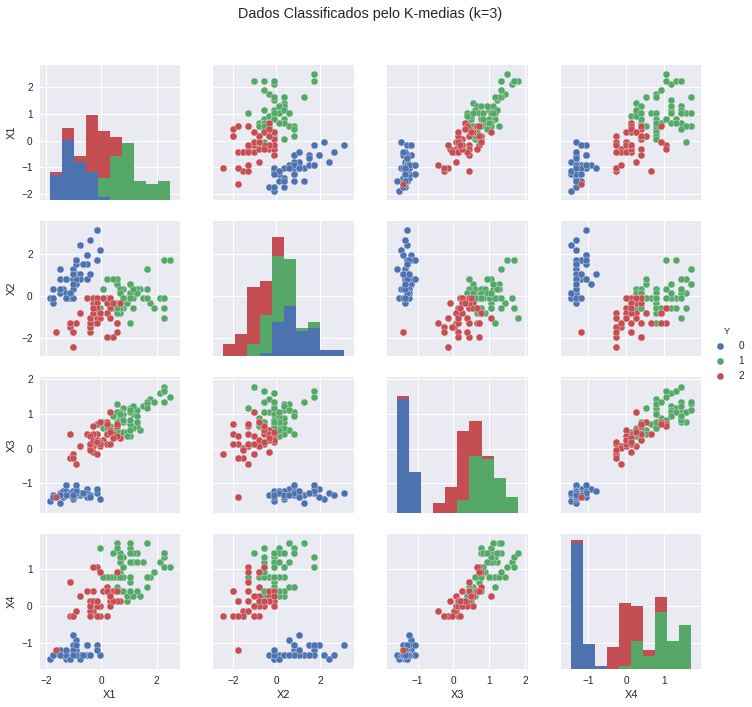

In [21]:
import seaborn as sns

test = df_inputs_norm[attributes[:-1]]
test['Y'] = pd.Series(map(clf.classify, test.values))
g = sns.pairplot(test, hue='Y', vars = attributes[:-1])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dados Classificados pelo K-medias (k=3)')
plt.show()

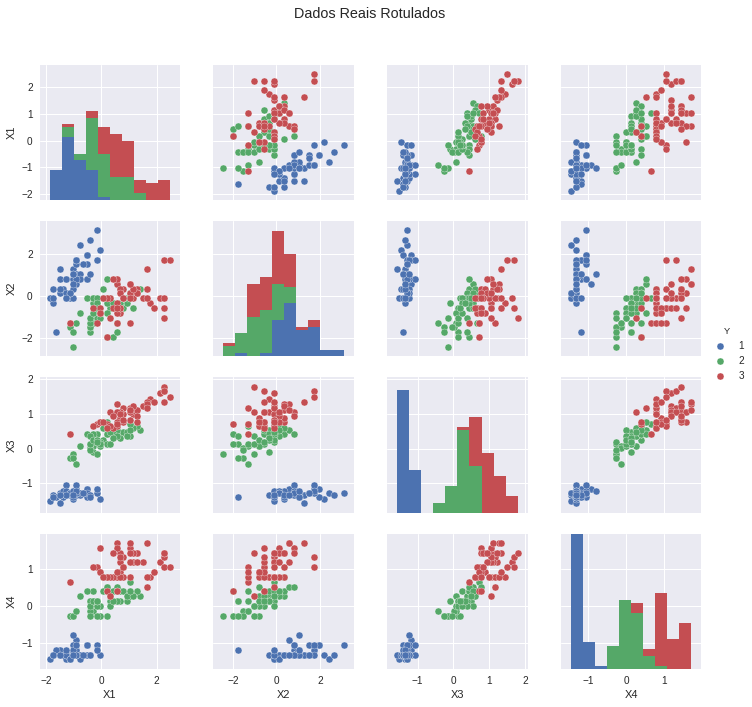

In [22]:
g = sns.pairplot(df_inputs_norm, hue='Y', vars = attributes[:-1])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dados Reais Rotulados')
plt.show()

### Comentários sobre os resultados:
É possível concluir que o k-médias conseguiu aproximar de maneira satisfatória a classificação dos dados reais com uma taxa de acerto de amis de 85%.

## 2)  PCA




- Utilizando a mesma base de dados da questão anterior, aplique o algoritmo PCA e reduza a dimensão de modo a preservar 99% da variância.
  - **Apresentar**: O número de atributos
  - **Comentários**: Comente sobre como foi obtido esse número de atributos.
- Reduza a dimensão da base de dados original para 2.
  - **Apresentar**: Figura em 2 dimensões com os dados. Utilize cores diferentes para cada classe.
  - **Comentários**: Sabendo que uma classe é linearmente separável e as outras duas não são, verifique se este comportamento é mantido para o conjunto de dados com 2 dimensões.

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(data)

print("Proporcao da variancia por entrada:")
print(pca.explained_variance_ratio_)  

Proporcao da variancia por entrada:
[ 0.72770452  0.23030523  0.03683832  0.00515193]


### Como foi obtido esse número de atributos:
Analisando a proporção de variância explicada por cada variável calculada pelo PCA, foi possível concluir que os atributos X1, X2 e X3 mantém mais de 99% da variância total.

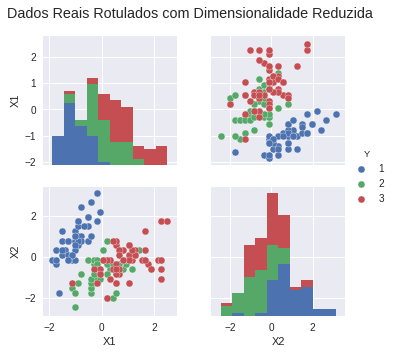

In [24]:
g = sns.pairplot(df_inputs_norm[['X1','X2',"Y"]], hue='Y', vars = attributes[:-3])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dados Reais Rotulados com Dimensionalidade Reduzida')
plt.show()

### Comentário sobre a a separação linear das classes:
Podemos ver por meio que da matriz de esplhamento acima que a classe 1 continua linearmente separável das classes 2 e 3.